In [2]:
ROOT_DATA_DIR = 'bagmerge/InterventionDetectionFiles/FirstFrameDepthRGB/'
TRAIN_DIR = ROOT_DATA_DIR + 'train/'
TEST_DIR = ROOT_DATA_DIR + 'test/'
TEST_SIZE = 0.20
K_FOLDS = 5
BATCH_SIZE = 32

In [3]:
import numpy as np
import pandas as pd
import cv2
import datetime
import time
import sys
import os
import csv
import libdst
import tensorflow as tf
from glob import glob
from sklearn.model_selection import train_test_split, StratifiedKFold
import shutil
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Rescaling
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import image_dataset_from_directory
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [4]:
noone_p1 = glob(ROOT_DATA_DIR + 'p1/noone/*.png')
nurse_p1 = glob(ROOT_DATA_DIR + 'p1/nurse/*.png')
noone_p2 = glob(ROOT_DATA_DIR + 'p2/noone/*.png')
nurse_p2 = glob(ROOT_DATA_DIR + 'p2/nurse/*.png')
noone_p5 = glob(ROOT_DATA_DIR + 'p5/noone/*.png')
nurse_p5 = glob(ROOT_DATA_DIR + 'p5/nurse/*.png')
noone_p6 = glob(ROOT_DATA_DIR + 'p6/noone/*.png')
nurse_p6 = glob(ROOT_DATA_DIR + 'p6/nurse/*.png')
noone_p8 = glob(ROOT_DATA_DIR + 'p8/noone/*.png')
nurse_p8 = glob(ROOT_DATA_DIR + 'p8/nurse/*.png')
noone_p9 = glob(ROOT_DATA_DIR + 'p9/noone/*.png')
nurse_p9 = glob(ROOT_DATA_DIR + 'p9/nurse/*.png')
noone_p10 = glob(ROOT_DATA_DIR + 'p10/noone/*.png')
nurse_p10 = glob(ROOT_DATA_DIR + 'p10/nurse/*.png')
noone_p11 = glob(ROOT_DATA_DIR + 'p11/noone/*.png')
nurse_p11 = glob(ROOT_DATA_DIR + 'p11/nurse/*.png')
noone_p13 = glob(ROOT_DATA_DIR + 'p13/noone/*.png')
nurse_p13 = glob(ROOT_DATA_DIR + 'p13/nurse/*.png')
noone_p14 = glob(ROOT_DATA_DIR + 'p14/noone/*.png')
nurse_p14 = glob(ROOT_DATA_DIR + 'p14/nurse/*.png')
noone_p15 = glob(ROOT_DATA_DIR + 'p15/noone/*.png')
nurse_p15 = glob(ROOT_DATA_DIR + 'p15/nurse/*.png')
noone_p16 = glob(ROOT_DATA_DIR + 'p16/noone/*.png')
nurse_p16 = glob(ROOT_DATA_DIR + 'p16/nurse/*.png')
noone_p17 = glob(ROOT_DATA_DIR + 'p17/noone/*.png')
nurse_p17 = glob(ROOT_DATA_DIR + 'p17/nurse/*.png')
noone_p18 = glob(ROOT_DATA_DIR + 'p18/noone/*.png')
nurse_p18 = glob(ROOT_DATA_DIR + 'p18/nurse/*.png')
noone_p19 = glob(ROOT_DATA_DIR + 'p19/noone/*.png')
nurse_p19 = glob(ROOT_DATA_DIR + 'p19/nurse/*.png')
noone_p21 = glob(ROOT_DATA_DIR + 'p21/noone/*.png')
nurse_p21 = glob(ROOT_DATA_DIR + 'p21/nurse/*.png')
noone_p22 = glob(ROOT_DATA_DIR + 'p22/noone/*.png')
nurse_p22 = glob(ROOT_DATA_DIR + 'p22/nurse/*.png')
noone_p23 = glob(ROOT_DATA_DIR + 'p23/noone/*.png')
nurse_p23 = glob(ROOT_DATA_DIR + 'p23/nurse/*.png')
noone_p24 = glob(ROOT_DATA_DIR + 'p24/noone/*.png')
nurse_p24 = glob(ROOT_DATA_DIR + 'p24/nurse/*.png')
noone_p25 = glob(ROOT_DATA_DIR + 'p25/noone/*.png')
nurse_p25 = glob(ROOT_DATA_DIR + 'p25/nurse/*.png')
noone_p26 = glob(ROOT_DATA_DIR + 'p26/noone/*.png')
nurse_p26 = glob(ROOT_DATA_DIR + 'p26/nurse/*.png')
noone_p27 = glob(ROOT_DATA_DIR + 'p27/noone/*.png')
nurse_p27 = glob(ROOT_DATA_DIR + 'p27/nurse/*.png')
noone_p28 = glob(ROOT_DATA_DIR + 'p28/noone/*.png')
nurse_p28 = glob(ROOT_DATA_DIR + 'p28/nurse/*.png')
noone_p29 = glob(ROOT_DATA_DIR + 'p29/noone/*.png')
nurse_p29 = glob(ROOT_DATA_DIR + 'p29/nurse/*.png')
noone_p30 = glob(ROOT_DATA_DIR + 'p30/noone/*.png')
nurse_p30 = glob(ROOT_DATA_DIR + 'p30/nurse/*.png')
noone_p31 = glob(ROOT_DATA_DIR + 'p31/noone/*.png')
nurse_p31 = glob(ROOT_DATA_DIR + 'p31/nurse/*.png')
noone_p32 = glob(ROOT_DATA_DIR + 'p32/noone/*.png')
nurse_p32 = glob(ROOT_DATA_DIR + 'p32/nurse/*.png')
noone_p33 = glob(ROOT_DATA_DIR + 'p33/noone/*.png')
nurse_p33 = glob(ROOT_DATA_DIR + 'p33/nurse/*.png')
noone_p34 = glob(ROOT_DATA_DIR + 'p34/noone/*.png')
nurse_p34 = glob(ROOT_DATA_DIR + 'p34/nurse/*.png')
noone_p35 = glob(ROOT_DATA_DIR + 'p35/noone/*.png')
nurse_p35 = glob(ROOT_DATA_DIR + 'p35/nurse/*.png')
noone_p36 = glob(ROOT_DATA_DIR + 'p36/noone/*.png')
nurse_p36 = glob(ROOT_DATA_DIR + 'p36/nurse/*.png')
noone_p37 = glob(ROOT_DATA_DIR + 'p37/noone/*.png')
nurse_p37 = glob(ROOT_DATA_DIR + 'p37/nurse/*.png')
noone_p38 = glob(ROOT_DATA_DIR + 'p38/noone/*.png')
nurse_p38 = glob(ROOT_DATA_DIR + 'p38/nurse/*.png')

all_noone = noone_p1 + noone_p2 + noone_p5 + noone_p6 + noone_p8 + noone_p9 + noone_p10 + noone_p11 + noone_p13 + noone_p14 + noone_p15 + noone_p16 + noone_p17 + noone_p18 + noone_p19 + noone_p21 + noone_p22 + noone_p23 + noone_p24 + noone_p26 + noone_p27 + noone_p28 + noone_p29 + noone_p30 + noone_p31 + noone_p32 + noone_p33 + noone_p34 + noone_p35 + noone_p36 + noone_p37 + noone_p38
all_nurse = nurse_p1 + nurse_p2 + nurse_p5 + nurse_p6 + nurse_p8 + nurse_p9 + nurse_p10 + nurse_p11 + nurse_p13 + nurse_p14 + nurse_p15 + nurse_p16 + nurse_p17 + nurse_p18 + nurse_p19 + nurse_p21 + nurse_p22 + nurse_p23 + nurse_p24 + nurse_p26 + nurse_p27 + nurse_p28 + nurse_p29 + nurse_p30 + nurse_p31 + nurse_p32 + nurse_p33 + nurse_p34 + nurse_p35 + nurse_p36 + nurse_p37 + nurse_p38

In [5]:
# DELETE THIS AFTER ALL DATA IS READY

# all_noone = noone_p30
# all_nurse = nurse_p30

In [6]:
all_noone_train, all_noone_test = train_test_split(all_noone, test_size=TEST_SIZE)
all_nurse_train, all_nurse_test = train_test_split(all_noone, test_size=TEST_SIZE)



In [7]:
remFiles = glob(TEST_DIR + 'noone/'+ '*.png')
for f in remFiles:
    os.remove(f)

remFiles = glob(TEST_DIR + 'nurse/'+ '*.png')
for f in remFiles:
    os.remove(f)

remFiles = glob(TRAIN_DIR + 'noone/'+ '*.png')
for f in remFiles:
    os.remove(f)

remFiles = glob(TRAIN_DIR + 'nurse/'+ '*.png')
for f in remFiles:
    os.remove(f)

In [8]:
for f in all_noone_test:
    basename = os.path.basename(f)
    dst_path = TEST_DIR + 'noone/' + basename
    shutil.copy(f, dst_path)

for f in all_noone_train:
    basename = os.path.basename(f)
    dst_path = TRAIN_DIR + 'noone/' + basename
    shutil.copy(f, dst_path)

for f in all_nurse_test:
    basename = os.path.basename(f)
    dst_path = TEST_DIR + 'nurse/' + basename
    shutil.copy(f, dst_path)

for f in all_nurse_train:
    basename = os.path.basename(f)
    dst_path = TRAIN_DIR + 'nurse/' + basename
    shutil.copy(f, dst_path)

In [9]:
noone_test = glob(TEST_DIR + 'noone/*.png')
nurse_test = glob(TEST_DIR + 'nurse/*.png')
noone_train = glob(TRAIN_DIR + 'noone/*.png')
nurse_train = glob(TRAIN_DIR + 'nurse/*.png')
all_test = (noone_test, nurse_test)
all_train = (noone_train, nurse_train)
labels = ('noone', 'nurse')

In [10]:
dataset_train = image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    # color_mode='grayscale',
    seed=123,
    subset="training",
    image_size=(480, 640),
    batch_size=BATCH_SIZE
)

dataset_val = image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    # color_mode='grayscale',
    seed=123,
    subset="validation",
    image_size=(480, 640),
    batch_size=BATCH_SIZE
)

Found 20606 files belonging to 2 classes.
Using 16485 files for training.
Found 20606 files belonging to 2 classes.
Using 4121 files for validation.


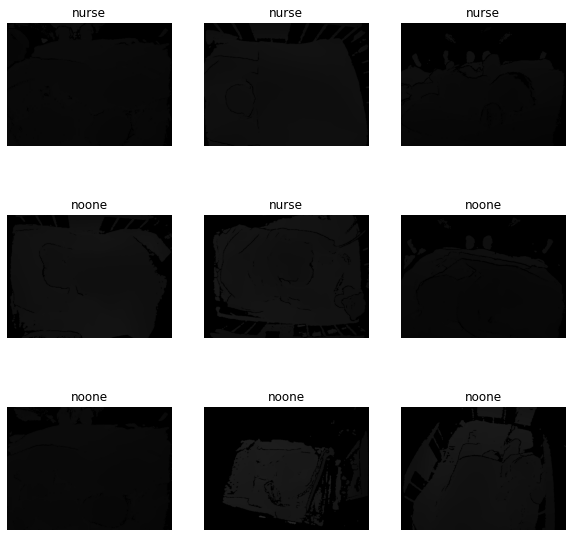

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(dataset_train.class_names[labels[i]])
        plt.axis("off")

In [12]:
dataset_train = dataset_train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_val = dataset_val.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

normalization_layer = tf.keras.layers.Rescaling(1./65525)

In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(480, 640, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 480, 640, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 480, 640, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 480, 640, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 240, 320, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 240, 320, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 240, 320, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 120, 160, 128)     0     

In [14]:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(480, 640, 3))

# for layer in base_model.layers:
#     layer.trainable = False

# x = base_model.output

# predictions = Dense(2, activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()

In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer=tf.optimizers.SGD(0.00001, momentum=0.9), metrics=["accuracy"])

In [16]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=8, verbose=1, mode='auto')

with tf.device('/CPU:0'):
    model.fit(
        x=dataset_train,
        epochs=20,
        # steps_per_epoch=10,
        validation_data=dataset_val,
        validation_steps=1,
        callbacks=[checkpoint, early]
        )

model.save_weights("vgg16_1.h5")

Epoch 1/20
  6/516 [..............................] - ETA: 1:12:51 - loss: 0.9506 - accuracy: 0.5000